In [1]:
!wget https://www.artfulhome.com/item_images/Additional/P/3601-3700/3686/large/9eebde58-f8a4-46ea-a923-f5999743b626_59474_l.jpg

--2021-11-23 11:03:05--  https://www.artfulhome.com/item_images/Additional/P/3601-3700/3686/large/9eebde58-f8a4-46ea-a923-f5999743b626_59474_l.jpg
Resolving www.artfulhome.com... 96.60.118.197
Connecting to www.artfulhome.com|96.60.118.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2072246 (2.0M) [image/jpeg]
Saving to: '9eebde58-f8a4-46ea-a923-f5999743b626_59474_l.jpg'

9eebde58-f8a4-46ea- 100%[===================>]   1.98M  6.15MB/s    in 0.3s    

2021-11-23 11:03:06 (6.15 MB/s) - '9eebde58-f8a4-46ea-a923-f5999743b626_59474_l.jpg' saved [2072246/2072246]



In [4]:
from PIL import Image
import numpy as np
import pandas as pd

In [5]:
milkyWay = Image.open("9eebde58-f8a4-46ea-a923-f5999743b626_59474_l.jpg")

In [8]:
print(milkyWay)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2400x2397 at 0x7FE3BF1D3450>


In [6]:
milkyWay_100x100 =  milkyWay.resize((100,100))
milkyWay_100x100_HSV =  milkyWay.resize((100,100)).convert('HSV')

In [7]:
milkyWay_100x100_np = np.array(milkyWay_100x100)
milkyWay_100x100_HSV_np = np.array(milkyWay_100x100_HSV)

In [8]:
milkyWay_100x100_np_top = milkyWay_100x100_np[:50:,]
milkyWay_100x100_HSV_np_top = milkyWay_100x100_HSV_np[:50:,]

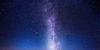

In [7]:
Image.fromarray(milkyWay_100x100_np_top)

In [9]:
import colorsys

In [10]:
index = pd.MultiIndex.from_product(
    (*map(range, milkyWay_100x100_np_top.shape[:2]), ('r', 'g', 'b')),
    names=('row', 'col', None)
)

df = pd.Series(milkyWay_100x100_np_top.flatten(), index=index).unstack().reset_index().reindex(columns=['col', 'row', 'r', 'g', 'b'])
df

,col,row,r,g,b
0,0,0,11,10,24
1,1,0,7,7,24
2,2,0,10,10,29
3,3,0,8,9,30
4,4,0,8,9,30
...,...,...,...,...,...
4995,95,49,30,31,81
4996,96,49,31,32,79
4997,97,49,30,31,75
4998,98,49,33,30,72


In [11]:
index_HSV = pd.MultiIndex.from_product(
    (*map(range, milkyWay_100x100_HSV_np_top.shape[:2]), ('h', 's', 'v')),
    names=('row', 'col', None)
)

df_HSV = pd.Series(milkyWay_100x100_HSV_np_top.flatten(), index=index_HSV).unstack().reset_index().reindex(columns=['col', 'row', 'h', 's', 'v'])
df_HSV

,col,row,h,s,v
0,0,0,173,148,24
1,1,0,170,180,24
2,2,0,170,167,29
3,3,0,168,187,30
4,4,0,168,187,30
...,...,...,...,...,...
4995,95,49,169,160,81
4996,96,49,169,154,79
4997,97,49,169,153,75
4998,98,49,173,148,72


In [12]:
%load_ext rpy2.ipython

In [13]:
%%R 
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [13]:
%%R
install.packages("cowplot")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/cowplot_1.1.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1353271 bytes (1.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [14]:
%%R
library(cowplot)

R[write to console]: `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



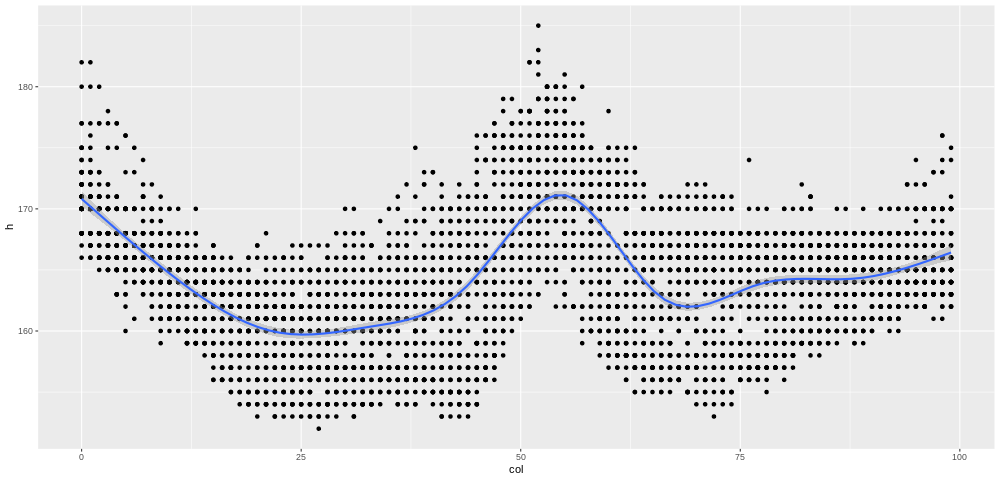

In [105]:
%%R -i df_HSV -w 1000
df_HSV %>% 
  # pivot_longer(c(row,col), values_to = "coord", names_to = "row_col") %>%
  # pivot_longer(c(h,s,v), values_to = "num", names_to = "hsv")
  ggplot(aes(x = col, y = h)) + 
    geom_point() + geom_smooth()

R[write to console]: `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



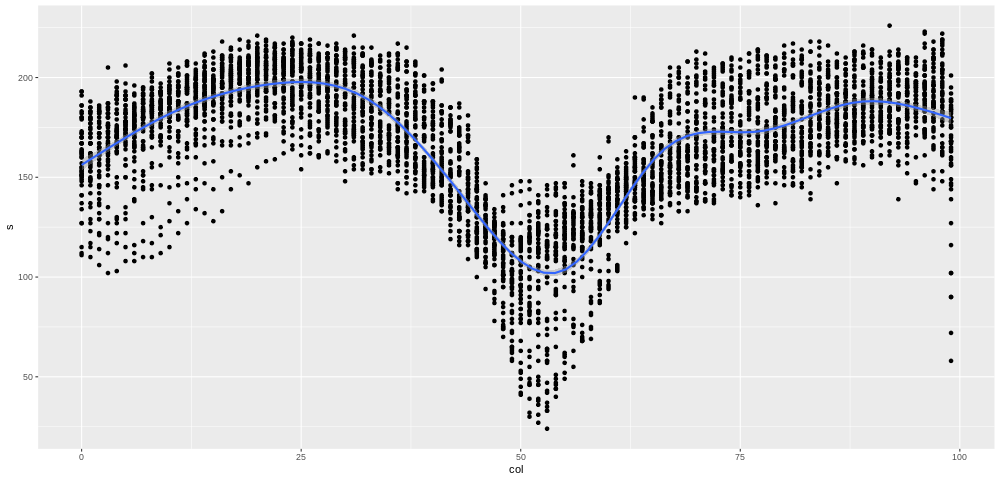

In [104]:
%%R -i df_HSV -w 1000
df_HSV %>% 
  # pivot_longer(c(row,col), values_to = "coord", names_to = "row_col") %>%
  # pivot_longer(c(h,s,v), values_to = "num", names_to = "hsv")
  ggplot(aes(x = col, y = s)) + 
    geom_point() + geom_smooth()

R[write to console]: `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



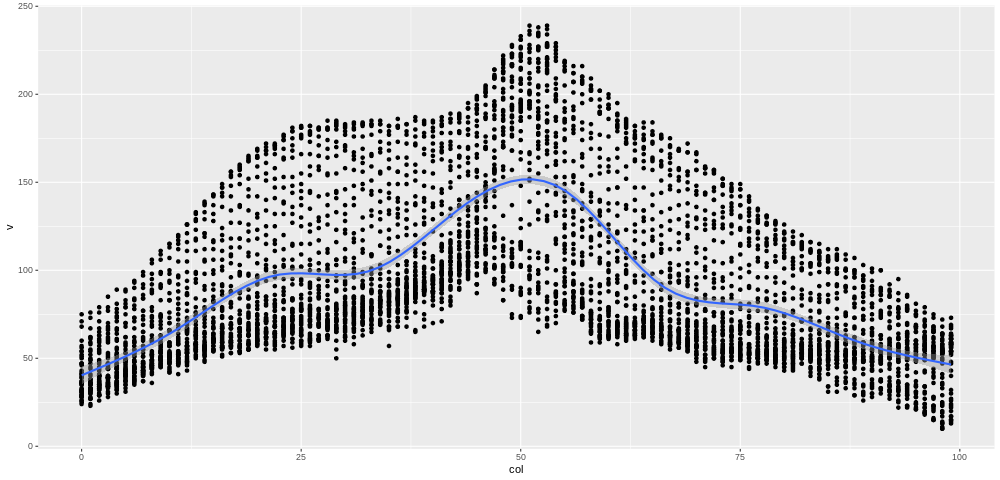

In [106]:
%%R -i df_HSV -w 1000
df_HSV %>% 
  # pivot_longer(c(row,col), values_to = "coord", names_to = "row_col") %>%
  # pivot_longer(c(h,s,v), values_to = "num", names_to = "hsv")
  ggplot(aes(x = col, y = v)) + 
    geom_point() + geom_smooth()

R[write to console]: `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



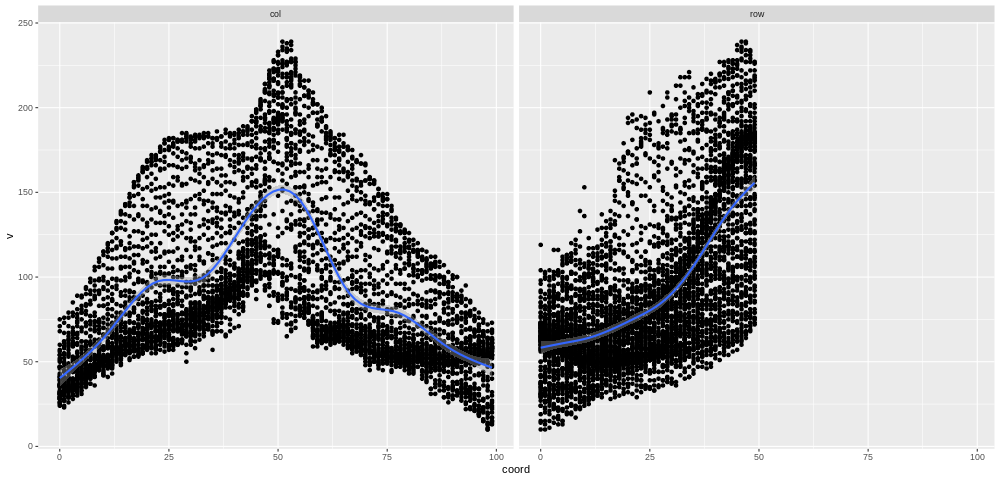

In [90]:
%%R -i df_HSV -w 1000
df_HSV %>% 
  pivot_longer(c(row,col), values_to = "coord", names_to = "row_col") %>%
  # pivot_longer(c(h,s,v), values_to = "num", names_to = "hsv")
  ggplot(aes(x = coord, y = v)) + 
    geom_point() + facet_wrap(~row_col) +
    geom_smooth()


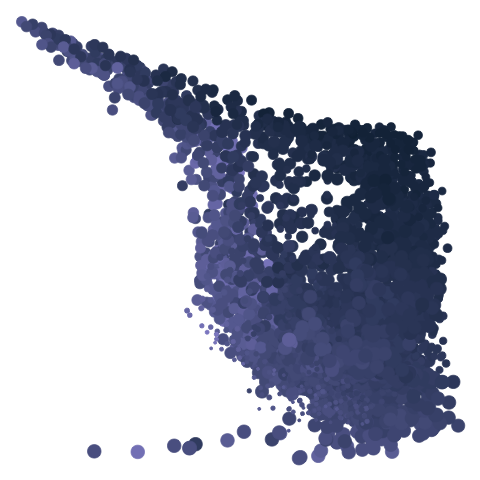

In [41]:
%%R -i df_HSV 
df_HSV %>%
  ggplot(aes(x = s , y = v, size = col, col = h)) +
    geom_jitter() +
    # geom_smooth() +
    theme_nothing() +
    scale_colour_gradient(
        # low = "#9B97DA", 
        high = "#9B97DA"
        )
    # scale_colour_gradient(
    #     low = "#D85D53", 
    #     high = "#DFC08E")

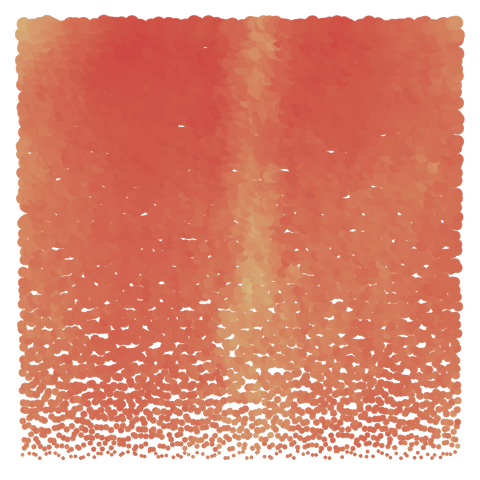

In [18]:
%%R -i df_HSV
po <- df_HSV %>% 
  ggplot(aes(x = col, y = row, col = h, size = row)) + 
    geom_jitter() + theme_nothing() +
    scale_colour_gradient(
        low = "#D85D53", 
        high = "#DFC08E")
  po

In [17]:
%%R -i df_HSV
ps <- df_HSV %>% 
  ggplot(aes(x = col, y = row, col = h, size = s)) + 
    geom_jitter() +
    theme_nothing() +
    scale_colour_gradient(
        # low = "#D85D53", 
        # high = "#DFC08E"
        )

In [40]:
%%R -i df_HSV
pv <- df_HSV %>% 
  ggplot(aes(x = col, y = row, col = h, size = v)) + 
    geom_jitter() +
    theme_nothing() +
    scale_colour_gradient(
        # low = "#9B97DA", 
        high = "#9B97DA"
        )

In [21]:
%%R -w 1000 -h 1000 

galactic_window_01 <- plot_grid(ph,ps,pv, po)
# save_plot("galactic_window_01.svg",galactic_window_01)
# galactic_window_01
ggsave("galactic_window_01.svg")

R[write to console]: Saving 13.9 x 13.9 in image



In [19]:
%%R
ph
ggsave("ph.svg")

R[write to console]: Error in withVisible({ : object 'ph' not found




Error in withVisible({ : object 'ph' not found


RInterpreterError: Failed to parse and evaluate line 'ph\nggsave("ph.svg")\n'.
R error message: "Error in withVisible({ : object 'ph' not found"

In [20]:
%%R -i df_HSV
ph <- df_HSV %>% 
  ggplot(aes(x = col, y = row, col = h, size = h)) + 
    geom_jitter() +
    theme_nothing() +
    scale_colour_gradient(
        # low = "#9B97DA", 
        high = "#9B97DA"
        )

In [ ]:
D85D53
DFC08E
E1D88B
CDE4D0
2CA17E

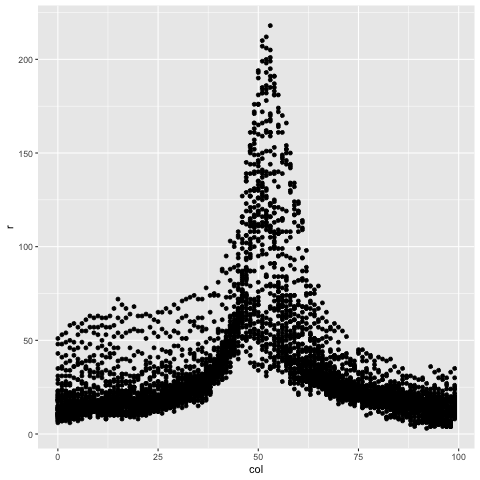

In [42]:
%%R -i df
df %>% 
  ggplot(aes(x = col, y = r)) + 
    geom_point()

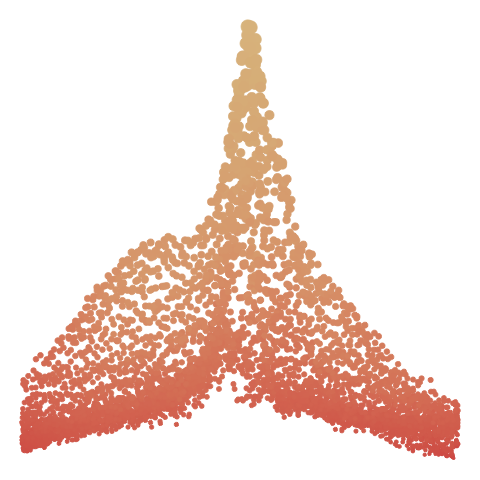

In [73]:
%%R
df %>% 
  # sample(5) %>%
  ggplot(aes(x = col, y = g, size = log(1/(max(g)-g)), col = b)) + 
    geom_jitter() +
    scale_colour_gradient(
        low = "#D85D53", 
        high = "#DFC08E") +
      theme_nothing()

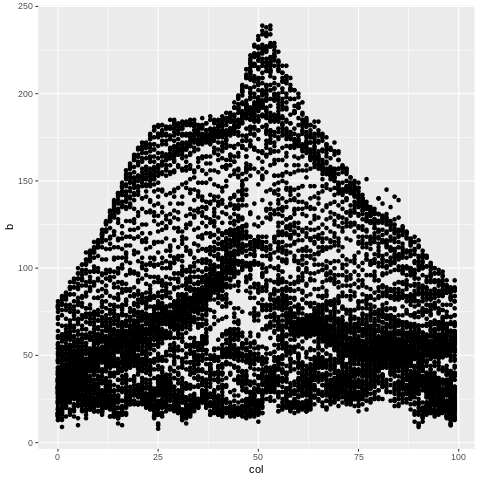

In [52]:
%%R
df %>% 
  ggplot(aes(x = col, y = b)) + 
    geom_point()

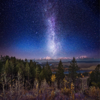

In [18]:
milkyWay_100x100

In [7]:
milkyWay

Output hidden; open in https://colab.research.google.com to view.